In [1]:
%matplotlib inline

import fs
import PIL
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import gc

try:
    import cPickle as pickle
except:
    import pickle

DATA_DIR = '../data'

WIKI_CROPS_DIR = "wiki_crop"
IMDB_CROPS_DIR = "imdb_crop"

WIKI_META_OBJ = 'wiki_meta.obj'
IMDB_META_OBJ = 'imdb_meta.obj'

TRAIN_DATA_OBJ = 'packaged/train_data'
VAL_DATA_OBJ = 'packaged/val_data'
TEST_DATA_OBJ = 'packaged/test_data'

# Define the number of samples per split for tiny dataset
train_samples = 10000
val_samples = 1000
test_samples = 1000

img_dim = (3,112,112)

np.random.seed(42)

In [2]:
lmap = lambda f, l: list(map(f, l))
lfilter = lambda f, l: list(filter(f, l))

def merge_meta_data(data1, data2):
    return {
        'path':   np.append(data1['path'], data2['path']),
        'name':   np.append(data1['name'], data2['name']),
        'age':    np.append(data1['age'], data2['age']),
        'gender': np.append(data1['gender'], data2['gender']),
    }

def filter_meta_data(data, filter_mask):
    return {
        'path':   data['path'][filter_mask].reshape(-1),
        'name':   data['name'][filter_mask].reshape(-1),
        'age':    data['age'][filter_mask].reshape(-1),
        'gender': data['gender'][filter_mask].reshape(-1),
    }

def shuffle_meta_data(data):
    idx = np.arange(len(data['age']))
    np.random.shuffle(idx)
    return filter_meta_data(data, idx)

def split_meta_data(data, f=0.1):
    intermediate = int(float(len(data['age'])) * f)
    idx1 = np.arange(intermediate)
    idx2 = np.arange(intermediate, len(data['age']))
    return filter_meta_data(data, idx1), filter_meta_data(data, idx2)

def to_bins(data, bins):
    bin_labels = lmap(lambda b: '%s-%s' % b, bins)
    binarize = lambda x: bins.index(next(filter(lambda e: x >= e[0] and x <= e[1], bins)))
    binarize_vec = np.vectorize(binarize)
    return binarize_vec(data), bin_labels
    
def plot_histo(data, bins=30, range=(0,100), figsize=(4,2), xticks=None, xlabel=None, ylabel=None, title=None, xticks_rotation=None):
    hist, bin_edges = np.histogram(data, bins=bins, range=range)

    plt.figure(figsize=figsize)
    plt.bar(bin_edges[:-1], hist, width=1)
    plt.xlim(min(bin_edges), max(bin_edges))
    if xticks is not None:
        plt.xticks(np.arange(len(xticks)) + 0.5, xticks, rotation=xticks_rotation)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.show()

# Load combined data

In [3]:
with open(fs.join(DATA_DIR, WIKI_META_OBJ), 'rb') as file:
    wiki_meta = pickle.load(file)
    
with open(fs.join(DATA_DIR, IMDB_META_OBJ), 'rb') as file:
    imdb_meta = pickle.load(file)

meta_all = merge_meta_data(imdb_meta, wiki_meta)

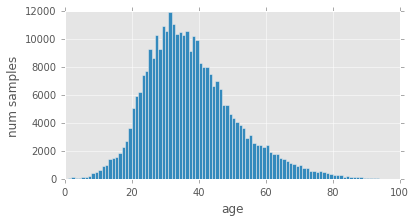

In [4]:
plot_histo(meta_all['age'], bins=100, figsize=(6,3), xlabel='age', ylabel='num samples')

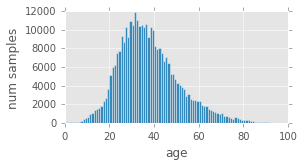

In [5]:
plot_histo(meta_all['age'], bins=100, xlabel='age', ylabel='num samples')

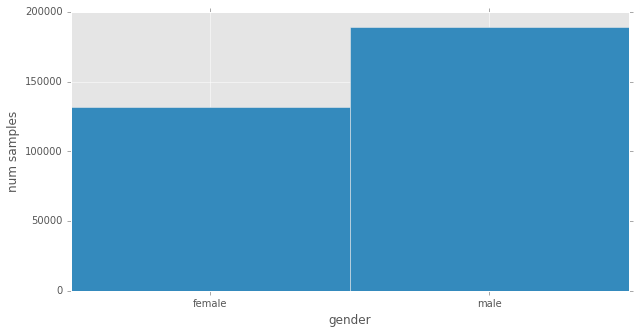

In [6]:
plot_histo(meta_all['gender'], bins=(0,1,2), xticks=['female', 'male'], figsize=(10,5), xlabel='gender', ylabel='num samples')

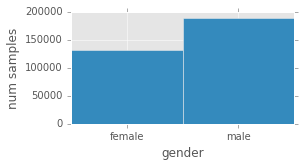

In [7]:
plot_histo(meta_all['gender'], bins=(0,1,2), xticks=['female', 'male'], xlabel='gender', ylabel='num samples')

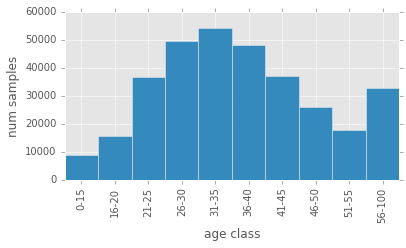

In [8]:
age_classes = [(0,15),(16,20),(21,25),(26,30),(31,35),(36,40),(41,45),(46,50),(51,55),(56,100)]

age_binned, age_labels = to_bins(meta_all['age'], age_classes)

plot_histo(age_binned, bins=range(len(age_labels) + 1), figsize=(6,3), xticks=age_labels, xlabel='age class', ylabel='num samples', xticks_rotation='vertical')

In [9]:
meta_all_shuffled = shuffle_meta_data(meta_all)

train, test = split_meta_data(meta_all_shuffled, 0.8)
train, val = split_meta_data(train, 0.9)

# Free some memory
del wiki_meta
del imdb_meta
del meta_all
del meta_all_shuffled
gc.collect()

47020

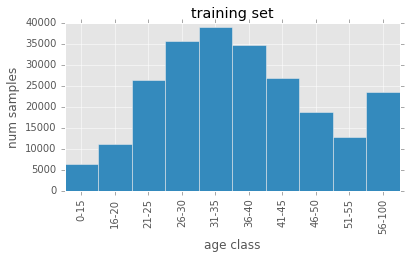

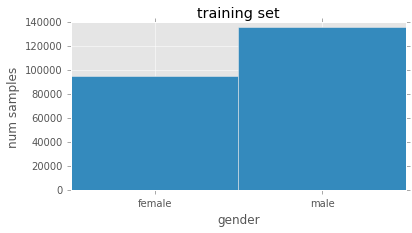

In [10]:
age_binned, age_labels = to_bins(train['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, figsize=(6,3),
           xlabel='age class', ylabel='num samples', xticks_rotation='vertical', title='training set')
plot_histo(train['gender'], bins=(0,1,2), xticks=['female', 'male'], xlabel='gender', ylabel='num samples',
          figsize=(6,3), title='training set')

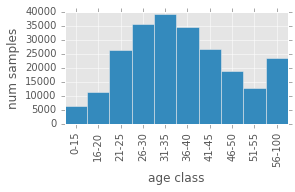

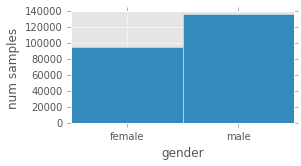

In [11]:
age_binned, age_labels = to_bins(train['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, figsize=(4,2),
           xlabel='age class', ylabel='num samples', xticks_rotation='vertical')
plot_histo(train['gender'], bins=(0,1,2), xticks=['female', 'male'], xlabel='gender', ylabel='num samples',
          figsize=(4,2))

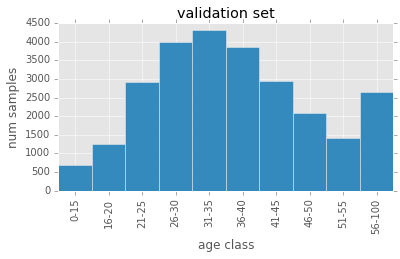

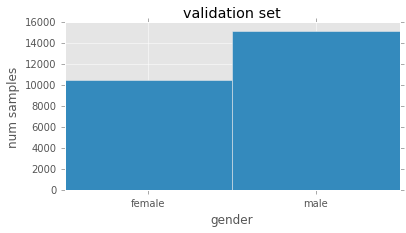

In [12]:
age_binned, age_labels = to_bins(val['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, figsize=(6,3),
           xlabel='age class', ylabel='num samples', xticks_rotation='vertical', title='validation set')
plot_histo(val['gender'], bins=(0,1,2), xticks=['female', 'male'], xlabel='gender', ylabel='num samples',
          figsize=(6,3), title='validation set')

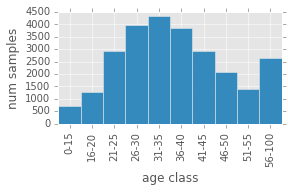

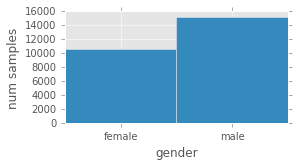

In [13]:
age_binned, age_labels = to_bins(val['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, figsize=(4,2),
           xlabel='age class', ylabel='num samples', xticks_rotation='vertical')
plot_histo(val['gender'], bins=(0,1,2), xticks=['female', 'male'], xlabel='gender', ylabel='num samples',
          figsize=(4,2))

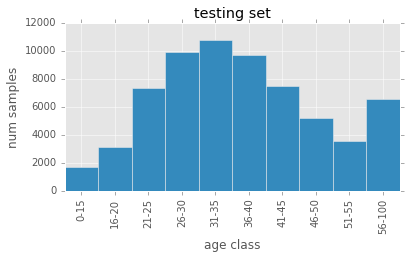

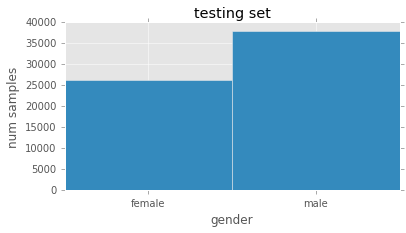

In [14]:
age_binned, age_labels = to_bins(test['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, figsize=(6,3),
           xlabel='age class', ylabel='num samples', xticks_rotation='vertical', title='testing set')
plot_histo(test['gender'], bins=(0,1,2), xticks=['female', 'male'], xlabel='gender', ylabel='num samples',
          figsize=(6,3), title='testing set')

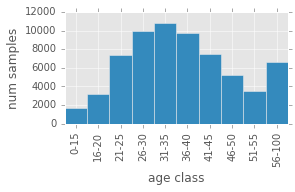

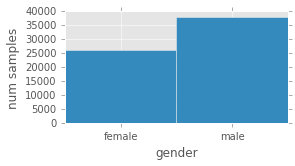

In [15]:
age_binned, age_labels = to_bins(test['age'], age_classes)
plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, figsize=(4,2),
           xlabel='age class', ylabel='num samples', xticks_rotation='vertical')
plot_histo(test['gender'], bins=(0,1,2), xticks=['female', 'male'], xlabel='gender', ylabel='num samples',
          figsize=(4,2))

In [16]:
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f%s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f%s%s" % (num, 'Yi', suffix)

def get_img_array(meta_data, img_dim=(3,224,224), split=0, num_samples_per_split=100000, dtype=np.float32):
    i_start = min(split * num_samples_per_split, len(meta_data['path']))
    i_stop = min(split * num_samples_per_split + num_samples_per_split, len(meta_data['path']))
    num_samples = i_stop - i_start
    
    X = np.zeros((num_samples,img_dim[0],img_dim[1],img_dim[2]), dtype=dtype)
    y_age = np.zeros((num_samples))
    y_gender = np.zeros((num_samples))
    
    print('  Allocating %s for dataset with shape (%i,%i,%i,%i)' %
          (sizeof_fmt(X.nbytes), num_samples, img_dim[0], img_dim[1], img_dim[2]))
    
    age_class = lambda x: age_classes.index(next(filter(lambda e: x >= e[0] and x <= e[1], age_classes)))
    
    for i in range(i_start, i_stop):
        y_age[i - i_start] = age_class(meta_data['age'][i])
        y_gender[i - i_start] = meta_data['gender'][i]
        abspath = fs.join(DATA_DIR, meta_data['path'][i])
        with Image.open(abspath) as img:
            # Rescale and convert to greyscale
            # PIL.Image.LANCZOS - a high-quality downsampling filter
            # PIL.Image.BICUBIC - cubic spline interpolation
            img = img.resize(img_dim[1:3], PIL.Image.LANCZOS).convert('RGB')
            img = np.asarray(img, dtype=dtype).reshape((img_dim)) / 255
            # Keras and Caffe uses the shape f, (d, y, x)
            X[i - i_start] = img
    return X, y_age, y_gender

# Generate a Tiny Dataset

In [17]:
print("%i Sapmles. %i Blocks required" % (len(train['path']), math.ceil(len(train['path']) / train_samples)))

X_train, y_age, y_gender = get_img_array(train, img_dim=img_dim, split=0, num_samples_per_split=train_samples)

np.save(fs.join(DATA_DIR, TRAIN_DATA_OBJ), X_train)
np.save(fs.add_suffix(fs.join(DATA_DIR, TRAIN_DATA_OBJ), '_label_age'), y_age)
np.save(fs.add_suffix(fs.join(DATA_DIR, TRAIN_DATA_OBJ), '_label_gender'), y_gender)

# Remove the array from memory
del X_train
del y_age
del y_gender
gc.collect()

235405 Sapmles. 24 Blocks required
  Allocating 1.4GiB for dataset with shape (10000,3,112,112)


22874

In [18]:
print("%i Sapmles. %i Blocks required" % (len(val['path']), math.ceil(len(val['path']) / val_samples)))

X_val, y_age, y_gender = get_img_array(val, img_dim=img_dim, split=0, num_samples_per_split=val_samples)

np.save(fs.join(DATA_DIR, VAL_DATA_OBJ), X_val)
np.save(fs.add_suffix(fs.join(DATA_DIR, VAL_DATA_OBJ), '_label_age'), y_age)
np.save(fs.add_suffix(fs.join(DATA_DIR, VAL_DATA_OBJ), '_label_gender'), y_gender)

# Remove the array from memory
del X_val
del y_age
del y_gender
gc.collect()

26157 Sapmles. 27 Blocks required
  Allocating 143.6MiB for dataset with shape (1000,3,112,112)


0

In [19]:
print("%i Sapmles. %i Blocks required" % (len(test['path']), math.ceil(len(test['path']) / test_samples)))

X_test, y_age, y_gender = get_img_array(test, img_dim=img_dim, split=0, num_samples_per_split=test_samples)

np.save(fs.join(DATA_DIR, TEST_DATA_OBJ), X_test)
np.save(fs.add_suffix(fs.join(DATA_DIR, TEST_DATA_OBJ), '_label_age'), y_age)
np.save(fs.add_suffix(fs.join(DATA_DIR, TEST_DATA_OBJ), '_label_gender'), y_gender)

# Remove the array from memory
del X_test
del y_age
del y_gender
gc.collect()

65391 Sapmles. 66 Blocks required
  Allocating 143.6MiB for dataset with shape (1000,3,112,112)


0